In [1]:
import os
import pickle as pkl
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
from scipy.sparse import data 


import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt

import sys
sys.path.append("C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts")
from utils import loadmatInPy
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
data_c1 = loadmatInPy('G:/My Drive/Analyzed/'+'asli_6-8-19_E1'+'_analyzed.mat')

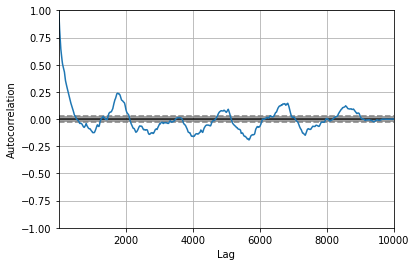

In [3]:

I = data_c1[0]['input_current']

x = pd.plotting.autocorrelation_plot(I[:10000])


In [74]:
I = data_c1[0]['input_current']
V = data_c1[0]['membrane_potential']
h = data_c1[0]['hidden_state']
spk_ind = data_c1[0]['spikeindices']
sta = []
TIME = 50*20
for i in spk_ind:
    sta.append(I[i-TIME:i])

# plt.plot(np.arange(-50,0,1/20),np.array(sta)[:,:].T,c='grey',linewidth=0.2,alpha=0.3)
# plt.plot(np.arange(-50,0,1/20),np.mean(np.array(sta).T,axis=1),c='r',linewidth=4,alpha=0.5)

# plt.show()   


shape of X is (5563, 1000)
shape of cov is (1000, 1000)
shape of X*cov  (1000, 5563)


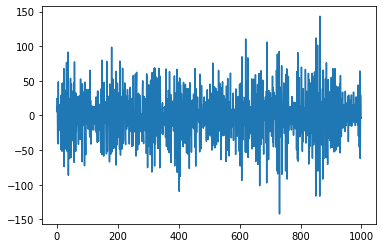

In [199]:
X = np.array(sta)
lambda_ = -0.1
print(f'shape of X is',np.shape(X))
cov_inv  = np.linalg.inv(np.cov(X.T)+(lambda_*np.ones(1000)))
print(f'shape of cov is',np.shape(cov_inv))
y = np.ones(5563)
print('shape of X*cov ',np.shape(np.matmul(cov_inv,X.T)))
plt.plot(np.matmul(np.matmul(cov_inv,X.T),y))

(5563, 1000)


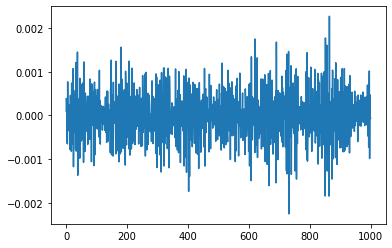

In [156]:
print(np.array(sta).shape)
X = np.array(sta)
y = np.ones((len(sta)))
cov_inv =np.linalg.inv(np.matmul(X.T,X)-100*np.identity(1000)) 
plt.plot(np.matmul(np.matmul(cov_inv, X.T),y))

In [157]:
# plt.plot(np.matmul(sta_T,np.ones((len(sta)))))
np.identity(1000)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

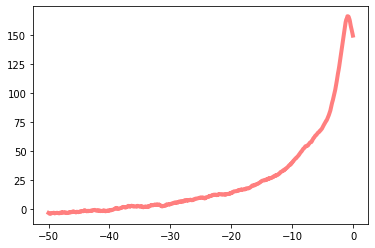

In [158]:
I_ = data_c1[0]['input_current']
V_ = data_c1[0]['membrane_potential']
h_ = data_c1[0]['hidden_state']
spk_ind = data_c1[0]['spikeindices']
sta = []
TIME = 50*20
for i in spk_ind:
    sta.append(I[i-TIME:i])
    
# plt.plot(np.arange(-50,0,1/20),np.array(sta)[:,:].T,c='grey',linewidth=0.2,alpha=0.3)
plt.plot(np.arange(-50,0,1/20),np.mean(np.array(sta).T,axis=1),c='r',linewidth=4,alpha=0.5)

plt.show()   

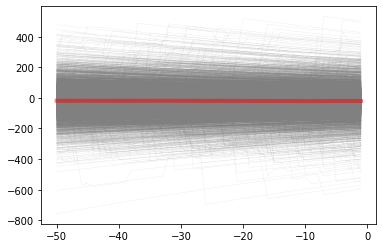

In [63]:
import random 
random_list = random.sample(range(1000,len(I),100),len(spk_ind) ) 
TIME = 50
rand_sta = [] 
for i in random_list:
    rand_sta.append(I[i-TIME:i])
plt.plot(np.arange(-TIME,0),np.array(rand_sta)[:,:].T,c='grey',linewidth=0.2,alpha=0.3)
plt.plot(np.arange(-TIME,0),np.mean(np.array(rand_sta).T,axis=1),c='r',linewidth=4,alpha=0.5)    

plt.show()    

In [57]:
import neo
from quantities import *
from elephant import statistics
from elephant.kernels import GaussianKernel
from elephant.statistics import isi, cv
from elephant.statistics import time_histogram, instantaneous_rate
from elephant import sta


UnitQuantity('volt', 1.0 * J/C, 'V')

In [58]:
sampling_rate = 1/20 

spiketrain = neo.SpikeTrain(spk_ind*sampling_rate, t_stop=len(V_)*(sampling_rate), units='ms')

signal = neo.AnalogSignal(np.array([I]).T, units='pA', sampling_rate=20/ms) 

sta_ = sta.spike_triggered_average(signal, spiketrain, (-50 * ms, 0.01* ms))


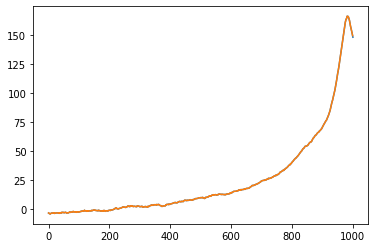

In [71]:
plt.plot(sta_)
# plt.show()
plt.plot(np.mean(np.array(sta).T,axis=1))


In [70]:
np.mean(np.array(sta).T,axis=1)

array([-3.67127695e+00, -3.80439926e+00, -3.95860099e+00, -4.32861925e+00,
       -4.40917118e+00, -4.48412723e+00, -4.53166935e+00, -4.17483756e+00,
       -4.06534951e+00, -3.92934995e+00, -3.73699967e+00, -3.77610234e+00,
       -3.79601964e+00, -3.87859395e+00, -3.71381948e+00, -3.61820283e+00,
       -3.59826154e+00, -3.79659324e+00, -3.54700401e+00, -3.78923403e+00,
       -4.08556896e+00, -3.98565822e+00, -3.93261527e+00, -3.75341624e+00,
       -3.81069095e+00, -3.72197844e+00, -3.61871895e+00, -3.57452379e+00,
       -3.60434104e+00, -3.59190562e+00, -3.62189506e+00, -3.82444213e+00,
       -3.77590159e+00, -3.69503575e+00, -4.00598558e+00, -3.95531531e+00,
       -4.00403274e+00, -3.54392268e+00, -3.48276235e+00, -3.62434922e+00,
       -3.65782463e+00, -3.79630252e+00, -3.31706333e+00, -3.21835334e+00,
       -3.45010168e+00, -3.28547480e+00, -3.27690317e+00, -3.11433628e+00,
       -3.15279546e+00, -3.35230235e+00, -3.45737047e+00, -3.42397468e+00,
       -3.55142415e+00, -